In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [82]:
# load data

data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/DailySales.csv", index_col=0)
data.index = pd.to_datetime(data.index)
data.head()


,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,526,3,9,0,66,472,260,116,45,202,...,85,38,0,97,19,7,0,174,55,12
2019-01-02,504,11,10,0,57,472,157,108,3,223,...,73,0,0,92,45,0,14,132,65,8
2019-01-03,499,0,10,0,42,475,154,104,0,199,...,65,20,5,84,89,0,4,132,39,6
2019-01-04,504,0,7,0,57,464,149,83,17,198,...,83,19,0,89,0,0,14,143,57,20
2019-01-05,499,15,9,0,31,466,159,84,14,219,...,97,31,0,104,0,8,28,46,44,15


Visualize the daily_hits

In [83]:
def visualize_data(data, title="Title", xlabel="xlabel", ylabel="ylabel"):
       fig, ax = plt.subplots(figsize=(8,8))
       ax.plot(data, linewidth=.5)
       ax.set(title=title,
              xlabel=xlabel,
              ylabel=ylabel,)
       ax.set_ylim(0)
       plt.gca().set_prop_cycle(None) #gca = get current axes
       ax.legend(data.columns, loc="best")
       plt.show()

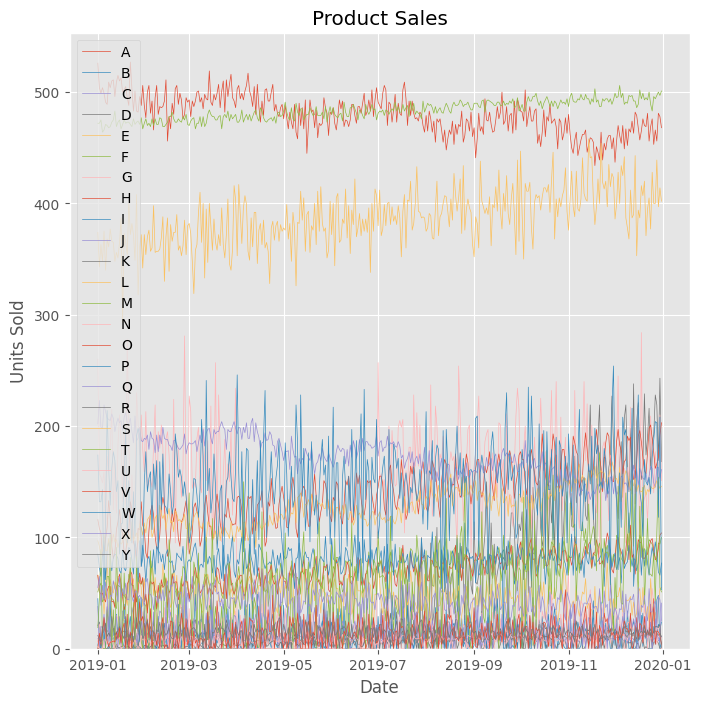

In [84]:
visualize_data(data, "Product Sales", "Date", "Units Sold")

In [85]:
sorted_data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
sorted_data.sum()

F    176462
A    175173
L    141115
J     63273
W     53517
H     51118
S     46225
G     45193
P     29187
M     25577
O     25573
T     20944
D     18672
E     17449
X     15809
Q      6272
N      6011
Y      5468
V      5330
I      5249
B      4489
C      3649
K      3346
U      3069
R      2457
dtype: int64

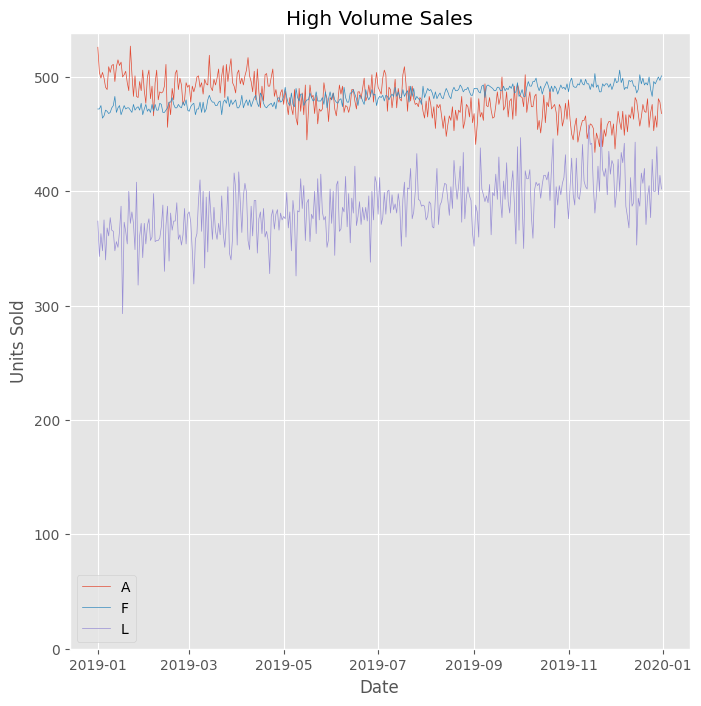

In [86]:
high = ["A", "F", "L"]
sorted_data[high].head()
visualize_data(data[high], "High Volume Sales", "Date", "Units Sold")


L has lots of noise. We use averages from pandas to remove some of the noise

In [87]:
sample_rate = "W" # D=daily, W=weekly, SM=semi-monthly(15 days), M=monthly, Q=quaterly, Y=yearly
average_data = sorted_data.resample(sample_rate).mean()
average_data.head()

,F,A,L,J,W,H,S,G,P,M,...,Q,N,Y,V,I,B,C,K,U,R
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-06,470.000000,503.833333,357.166667,209.000000,124.500000,98.833333,92.333333,162.833333,77.500000,50.333333,...,20.500000,9.666667,14.000000,12.666667,13.166667,4.833333,9.833333,17.166667,3.833333,0.833333
2019-01-13,472.428571,504.000000,363.000000,204.714286,165.000000,103.714286,94.428571,163.428571,84.142857,49.285714,...,20.571429,16.285714,15.571429,7.000000,19.142857,6.571429,9.142857,14.142857,4.428571,1.000000
2019-01-20,472.285714,505.714286,355.428571,204.857143,129.857143,103.142857,96.285714,188.000000,75.857143,51.285714,...,19.285714,15.428571,15.000000,15.000000,15.857143,11.142857,10.285714,14.857143,6.000000,1.714286
2019-01-27,472.428571,495.285714,371.571429,196.285714,143.000000,105.285714,101.571429,163.714286,81.428571,56.285714,...,17.714286,12.428571,14.428571,19.571429,19.571429,5.571429,10.714286,9.857143,4.571429,1.000000
2019-02-03,472.142857,494.428571,363.857143,188.571429,138.142857,104.285714,110.571429,175.571429,81.000000,50.428571,...,23.142857,16.571429,17.857143,21.714286,14.285714,6.714286,10.714286,15.428571,7.285714,1.142857


In [88]:
sorted_data["F"][:7].mean()

470.0

<!--  -->

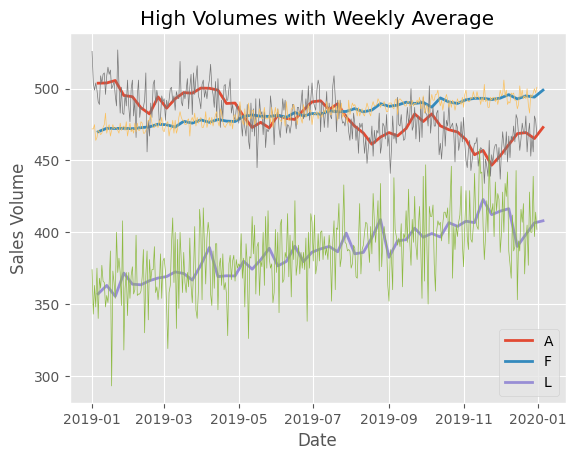

In [89]:
# .gca() gets the current axes (i.e. the current chart)
# .set_prop_cycle(None) resets all the properties for this chart, including colours, linestyles, etc.
# we use different line widths to distinguish the averages from the original


plt.plot(average_data[high], linewidth=2)
plt.plot(data[high], linewidth=.5)
plt.gca().set_prop_cycle(None) #gca = get current axes
plt.title("High Volumes with Weekly Average")
plt.xlabel("Date")
plt.legend(data[high].columns)
plt.ylabel("Sales Volume")
plt.show()

Sometimes the average can obscure the noise a bit too much

An alternative is the rolling average

also known as moving average, running average, rolling mean, …


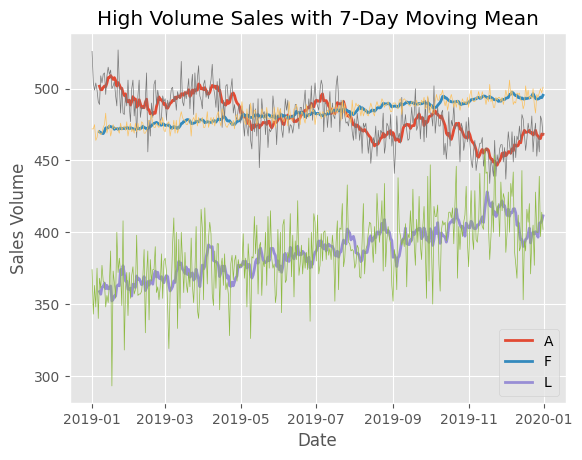

In [90]:
period = 7
rolling_average = data.rolling(window=period).mean()
high = ["A", "F", "L"]

# Visualize high sales data
plt.plot(rolling_average[high], linewidth=2)
plt.plot(data[high], linewidth=.5)
plt.gca().set_prop_cycle(None) #gca = get current axes
plt.title("High Volume Sales with 7-Day Moving Mean")
plt.xlabel("Date")
plt.legend(data[high].columns)
plt.ylabel("Sales Volume")
plt.show()

Another way of making sense of the data is to calculate a trendline for each time-series a line showing whether the general trend of the time-series is increasing over time or decreasing or flat The formal name for this is `linear regression`. Linear because we compute a straight line through the data points.

There are also more advanced techniques, e.g:
- `non-linear regression` – i.e. compute a curved trendline (because most trends don’t actually go in a straight line!)
- `multivariate regression` – i.e. compute a trendline for a combination of time-series (beyond the scope of this module)


Pandas doesn’t have a method to calculate trendlines, instead we use NumPy to do this.

Here’s the program


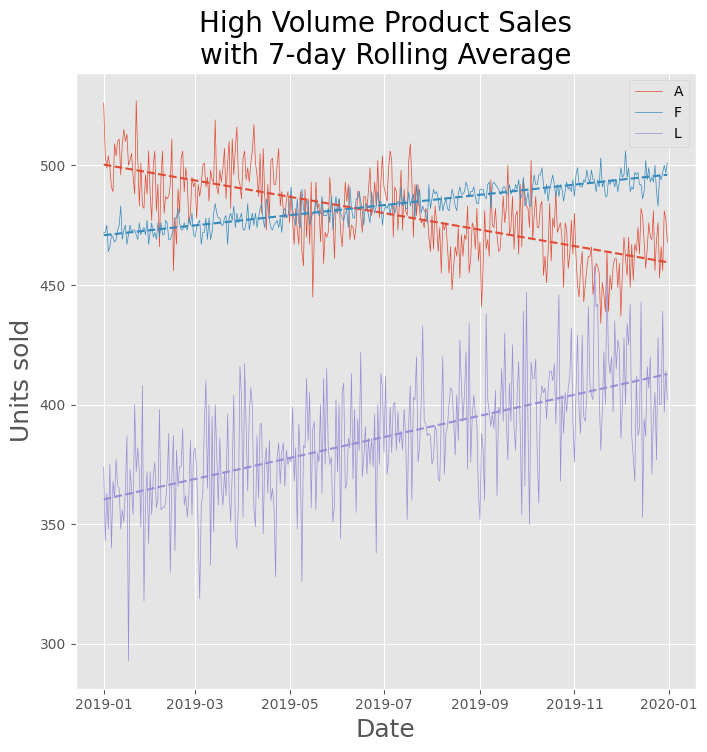

In [91]:
plt.figure(figsize=(8,8))
plt.plot(data[high], linewidth=.5)
plt.gca().set_prop_cycle(None)
# plt.plot(rolling_average[high], linewidth=2)
for name in high:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle="--")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title(f"High Volume Product Sales\nwith {period}-day Rolling Average", fontsize=20)
plt.legend(data[high], loc="best")
plt.show()


<!--  -->

To create a trendline for each high time-series

- Loop over the high columns
- NumPy fits a polynomial curve to the time-series using polyfit() 
- the 1 indicates that it is linear (a straight line is a polynomial of degree 1)
- We “save” the trendline NumPy has calculated in a function called trend
- Plot the trendline against the dates (i.e. the index of the dataframe)



In [92]:
def add_trend(data, slice, degree=1):
    plt.gca().set_prop_cycle(None)
    for name in slice:
        x = np.arange(len(data[name]))
        z = np.polyfit(x, data[name], degree)
        trend = np.poly1d(z)
        plt.plot(data.index, trend(x), linestyle='--')


### 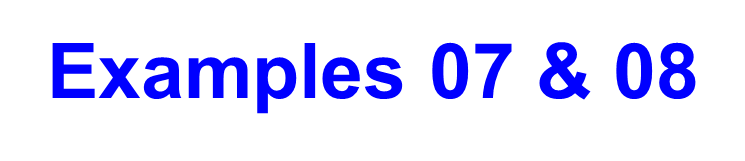

We can now apply these techniques to other segments of the data, e.g. for medium volume the only change is

medium = ['G', 'H', 'J', 'S', 'W']

Examples 07 & 08 explore the medium volume products and show how the rolling averages really help to show what is going on




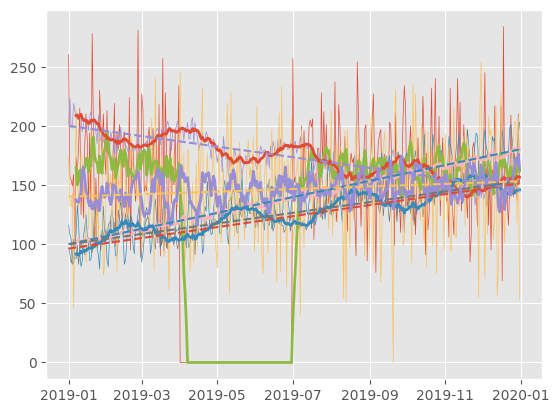

In [93]:
medium = ['G', 'H', 'J', 'S', 'W']
# add_trend(data, medium)
plt.plot(data[medium], linewidth=.5)
plt.plot(rolling_average[medium], linewidth=2)
add_trend(data[medium], medium)
plt.show()


# something has happened to product G between April & June (out of stock, data error, …?)
# G and W had zero sales between April and June. Probalby out of stock

### Examples 9 & 10


Examples 09 & 10 show the time-series plots with rolling averages for low & very low volume products

low = ['D', 'E', 'M', 'O', 'P', 'T', 'X']


very_low = ['B', 'C', 'I', 'K', 'N', 'Q', 'R', 'U', 'V', 'Y']


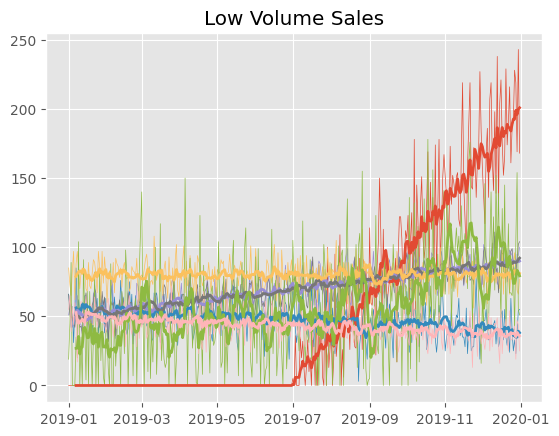

In [94]:
# Example 9
low = ['D', 'E', 'M', 'O', 'P', 'T', 'X']

plt.plot(data[low], linewidth=.5)
plt.plot(rolling_average[low], linewidth=2)
plt.title("Low Volume Sales")
# add_trend(data[low], low)
plt.show()




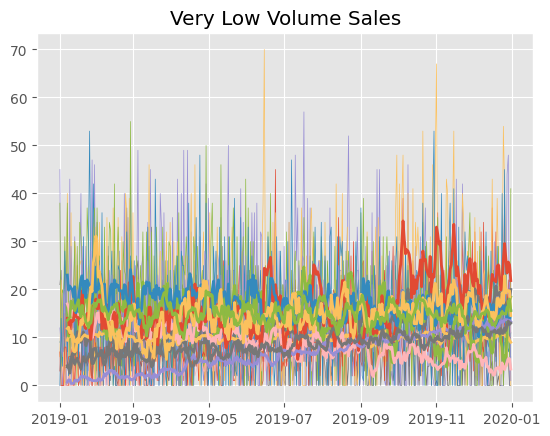

In [95]:
# Example 10
very_low = ['B', 'C', 'I', 'K', 'N', 'Q', 'R', 'U', 'V', 'Y']

plt.plot(data[very_low], linewidth=.5)
plt.plot(rolling_average[very_low], linewidth=2)
plt.title("Very Low Volume Sales")
# add_trend(data[very_low], very_low)
plt.show()

The very low volume plot (example 10) still has too much noise to make sense of 

Can reduce the noise in a number of ways

only show average or rolling average line plots. extend the averaging period (e.g. monthly averages / 28-day rolling averages)

For data with lots of noise (a.k.a. a high noise-to-signal ratio) can fit a higher order polynomial as a trendline in polyfit() e.g. 2 for a quadratic curve, 3 for a cubic curve, or 10 for a polynomial of degree 10
but the higher the number the more closely it fits the data (and so is less valuable as trend) also for higher numbers, the calculations become more and more inaccurate Or can segment the data further


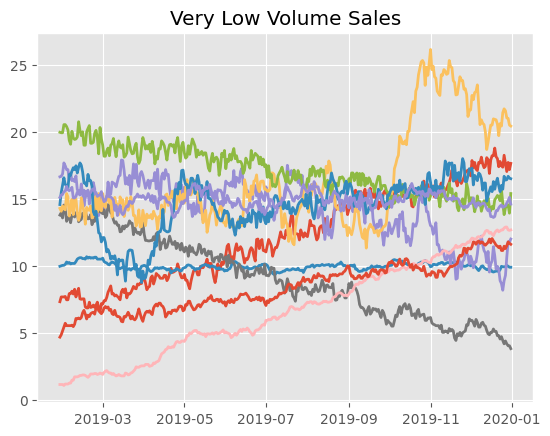

In [96]:
very_low = ['B', 'C', 'I', 'K', 'N', 'Q', 'R', 'U', 'V', 'Y']
rolling_average = data.rolling(window=28).mean() # change rolling average window period to 4 weeks to reduce noise
# plt.plot(data[very_low], linewidth=.5)
plt.plot(rolling_average[very_low], linewidth=2)
plt.title("Very Low Volume Sales")
# add_trend(data[very_low], very_low)
plt.show()

### Examples 11 & 12

Examples 11 & 12 show a couple of examples for very low volume data

example 11 shows monthly average data with linear trendlines

example 12 shows 28-day rolling average data with trendlines of degree 3 (cubic equations)


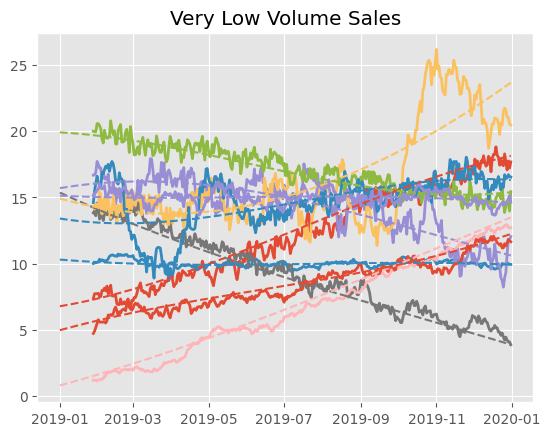

In [97]:
very_low = ['B', 'C', 'I', 'K', 'N', 'Q', 'R', 'U', 'V', 'Y']
rolling_average = data.rolling(window=28).mean() # change rolling average window period to 4 weeks to reduce noise
# plt.plot(data[very_low], linewidth=.5)
plt.plot(rolling_average[very_low], linewidth=2)
plt.title("Very Low Volume Sales")
add_trend(data[very_low], very_low, 3)
plt.show()

# 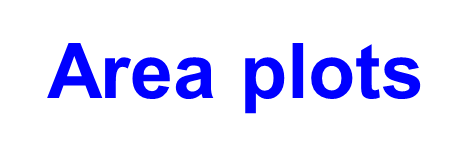
We now have a much clearer picture of how individual products are selling

But we still don’t know how the company is doing as whole, in terms of sales

An easy way to do this is with a stacked area plot

Like a line plot but the area under each line is filled in the areas are stacked on top of each other 


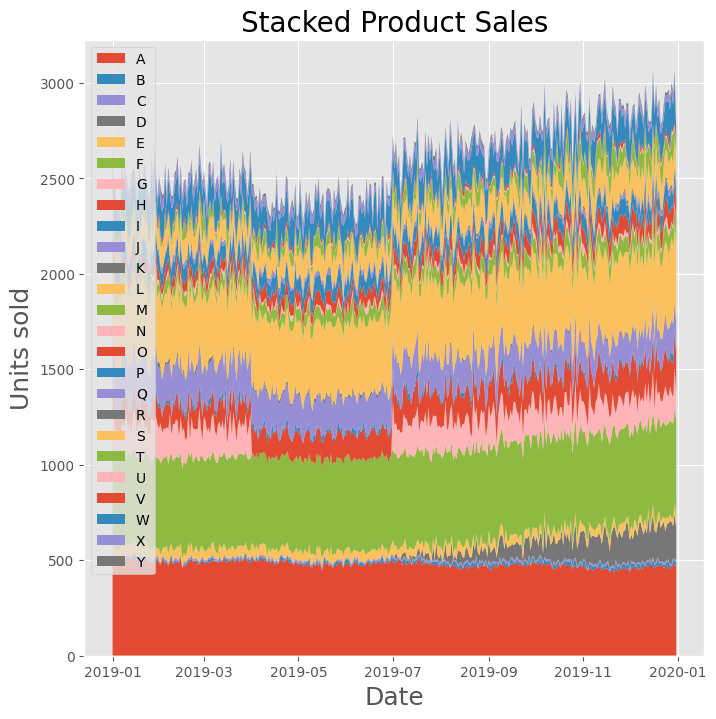

In [105]:
plt.figure(figsize=(8, 8))
plt.stackplot(data.index, data.transpose()) 
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Stacked Product Sales',
    fontsize=20)
plt.legend(data.columns, loc=2)
plt.show()


# Clearly shows
# the company sales are growing overall
# the sudden disappearance of product G in the second quarter of the year
# the growth of product D in the second half of the year


# 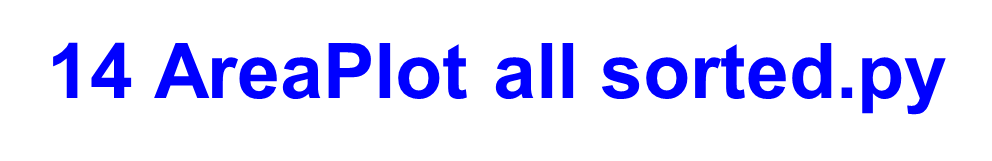
It’s generally considered good practice to sort the data before creating a stacked area plot so that the higher volume data is at the bottom Here’s the program and resulting plot

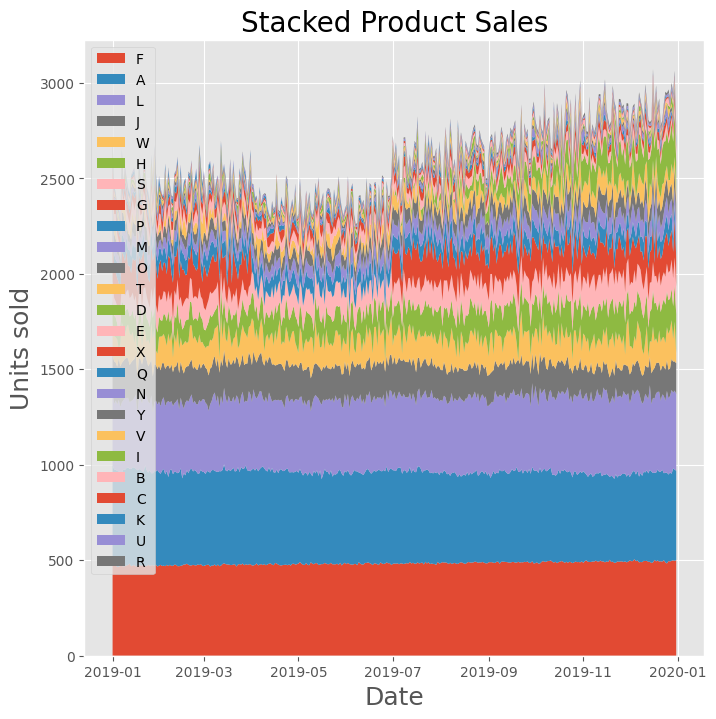

In [109]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(8, 8))
plt.stackplot(data.index, data.transpose())
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Stacked Product Sales', fontsize=20)
plt.legend(data.columns, loc=2)
plt.show()




# Shows relative proportions of high and medium volume products better … 
# … but doesn’t show the growth of product D so clearly


In [108]:
data.sum().sort_values(ascending=False)

F    176462
A    175173
L    141115
J     63273
W     53517
H     51118
S     46225
G     45193
P     29187
M     25577
O     25573
T     20944
D     18672
E     17449
X     15809
Q      6272
N      6011
Y      5468
V      5330
I      5249
B      4489
C      3649
K      3346
U      3069
R      2457
dtype: int64